In [300]:
import numpy as np
import scipy
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve


# Problem 1

In [301]:
import numpy as np
N  = 200
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .2

In [302]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [303]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [304]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [305]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [306]:
f = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))

In [307]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0

    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u = f(u_star,step)
        assert(np.mean(np.sign(u)==np.sign(u_star))==1)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u = f(u_star,step)
    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [308]:
uu,tt = run_forward_method(u0_flat,f,lap,0,200,dt)

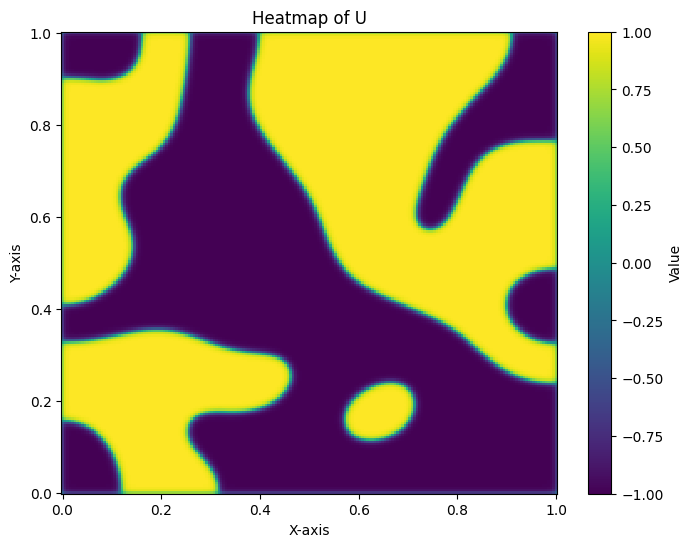

In [309]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-16].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of U')
plt.show()


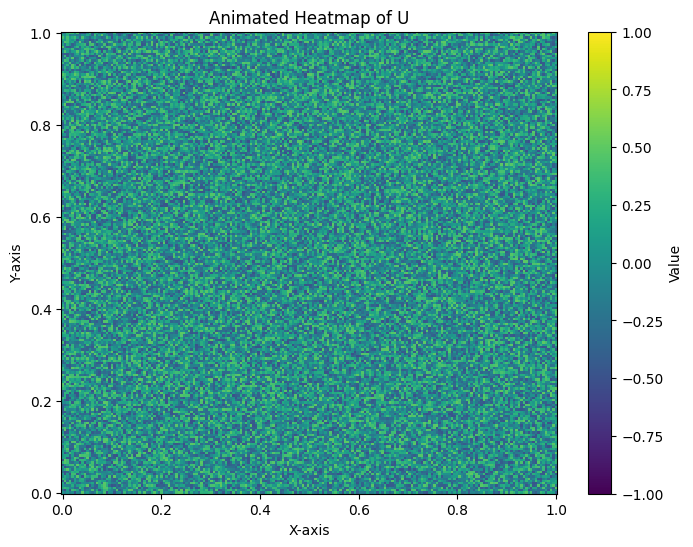

In [310]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
astep = len(uu)//30
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu[0].reshape(N,N), shading='auto', cmap='viridis', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=30, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[4.09987159721176e-17, 5.357301967327035e-05, 0.0001057711879032403, 0.000160063818741486, 0.00021775075897826908, 0.0002778792391711261, 0.00033673758894658517, 0.0003870809895582218, 0.0004172980670718292, 0.00041084425411611254, 0.00034637954850319963, 0.00019905886006698457, -5.676459349921639e-05, -0.0004435683200042901, -0.0009760634302636335, -0.0016569516919759386, -0.002474011628202463, -0.003399213340534377, -0.0043902876597116175, -0.005394973348340203, -0.006357703983239375, -0.007227549331140608, -0.007965373895992297, -0.008548418587804854, -0.008971767664060108, -0.00924703739485904, -0.009398618462053403, -0.009458105919248977, -0.009458433792337392, -0.009429319167741803, -0.009394664686328186, -0.009371784184903665, -0.009371972648956051, -0.009401620959421614, -0.009463134170832074, -0.009555450535308761, -0.009674310499525381, -0.00981254531736461, -0.00996081219338227, -0.0101089005739593, -0.010247046166456955, -0.010366691955211095, -0.010460775632700791, -0.0105

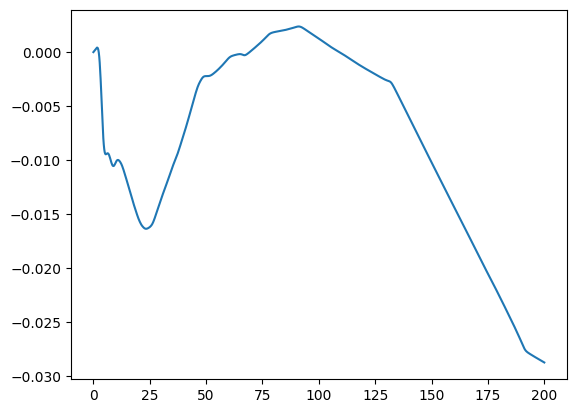

In [311]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
print(mass)
print(len(uu))
plt.plot(tt,mass)

# Problem 2

In [ ]:
import numpy as np
N  = 200
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .2

In [ ]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [ ]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [ ]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [ ]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [312]:
phi_star = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))
F = lambda phi : (phi**2-1)**2/4
F_prime = lambda phi: phi**3 - phi
beta = lambda phi_ss, phi_0 : sum(phi_0 - phi_ss)/sum(np.sqrt(F(phi_ss))) * 1/dt
phi_ss = lambda phi_ss, phi_0 : phi_ss + dt*beta(phi_ss,phi_0)*np.sqrt(F(phi_ss))


In [318]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0
    u0 = u
    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u_ss = f(u_star,step)
        u = phi_ss(u_ss,u0)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u_ss = f(u_star,step)
    u = phi_ss(u_ss,u0)

    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [319]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

C:\Users\andyh\AppData\Local\Temp\ipykernel_27552\980788261.py:10: UserWarning: shading value 'bilinear' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts


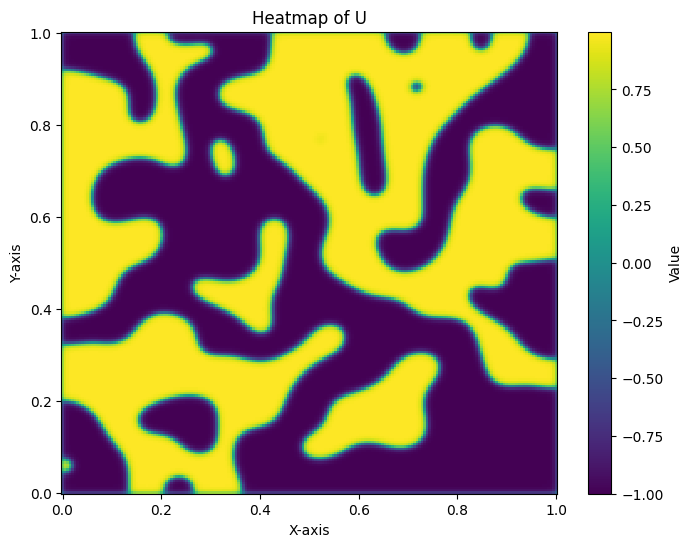

In [339]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-16].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of U')
plt.show()


In [328]:
# Interpolate data to add more frames
num_original_frames = len(uu)
interpolation_factor = 30  # Number of extra frames between each original frame
num_frames = num_original_frames * interpolation_factor

uu_interp = []
for i in range(num_original_frames - 1):
    for t in np.linspace(0, 1, interpolation_factor, endpoint=False):
        U_interp = (1 - t) * uu[i] + t * uu[i + 1]
        uu_interp.append(U_interp)
uu_interp.append(uu[-1])  # Add the last frame

C:\Users\andyh\AppData\Local\Temp\ipykernel_27552\3674681304.py:11: UserWarning: shading value 'cubic' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)


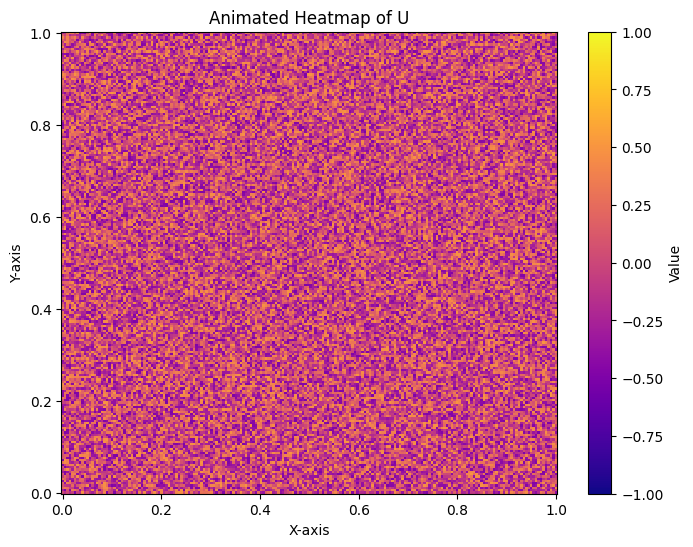

In [341]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
frames = 60
astep = len(uu_interp)//frames
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu_interp[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[4.09987159721176e-17, 3.9653025075877417e-17, 3.9473599623045395e-17, 4.108842869853361e-17, 2.8887497905955945e-17, 4.844487226464662e-17, 6.979650115165753e-17, 7.248788294413789e-17, 1.722484347187435e-17, 6.88993738874974e-17, -3.51673887550768e-17, 1.0334906083124611e-16, 2.153105433984294e-18, 3.9473599623045395e-17, 1.3277483509569812e-16, 3.4019065856951843e-16, 2.6698507381405247e-16, 1.1339688618983947e-16, -1.2344471154843284e-16, 4.019130143437349e-17, 2.6411426656874007e-16, 1.8947327819061787e-16, -2.095689289078046e-16, 1.377987477749948e-16, 2.870807245312392e-17, -1.2344471154843284e-16, 2.0382731441717982e-16, 1.5502359124686916e-16, 7.234434258187227e-16, -5.110036896656058e-16, -9.760744634062132e-17, -1.2344471154843284e-16, 3.58850905664049e-16, 7.406682692905972e-16, 6.028695215156023e-17, -1.779900492093683e-16, -7.004769678562236e-16, -1.377987477749948e-16, 4.2775027955154643e-16, 2.0095650717186744e-16, 4.90908038948419e-16, -7.004769678562236e-16, 2.0095650

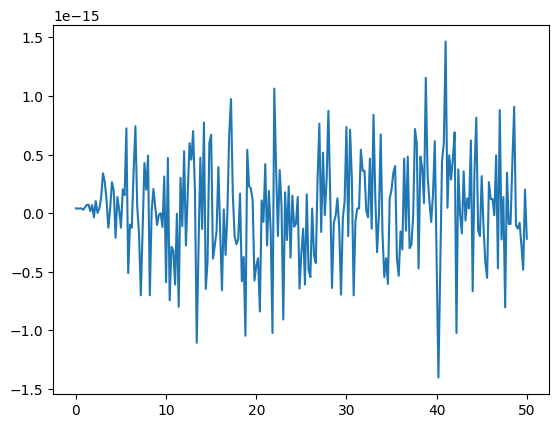

In [322]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
print(mass)
print(len(uu))
plt.plot(tt,mass)